# <center> Plots for journal </center>

In [1]:
import sys
import util
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from operator import itemgetter
mpl.rcParams.update({'font.size': 14})
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

In [2]:
out_path = "../PsiResults/Plots_journal/"
name = "russian15"

## Lists comparison

Load dataframes.

In [7]:
df_oursin = pd.read_csv("../PsiResults/ComparePsis/russian_emul_oursin_15iter/compare_lists_df.txt")
x = df_oursin['N'].values
df_cascade = pd.read_csv("../PsiResults/ComparePsis/russian_emul_cascade/compare_lists_df.txt")

# df_oursin = pd.read_csv("../PsiResults/ComparePsis/weibo_emul_oursin_top8002emul/compare_lists_df.txt")
# df_cascade = pd.read_csv("../PsiResults/ComparePsis/weibo_emul_cascade_top1501emul/compare_lists_df.txt")
# df_truegraph = pd.read_csv("../PsiResults/ComparePsis/weibo_emul_truegraph_top8002emul/compare_lists_df.txt")

# df_oursin = pd.read_csv("../PsiResults/ComparePsis/wcano_emul_oursin/compare_lists_df.txt")

Plot kendall tau

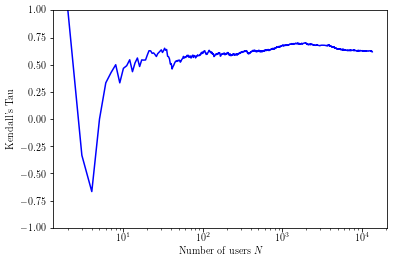

In [9]:
# init
x = df_oursin['N'].values
fig, ax = plt.subplots()

# plot kendall tau
ax.semilogx(x, df_oursin['kendall'].values, color='blue', label="star")
ax.semilogx(x, df_cascade['kendall'].values, color='red', ls='--', label="cascade")
# ax.semilogx(x, df_truegraph['kendall'].values, color='red', ls='--', label="real")

# labels & legend
plt.xlabel(r"Number of users $N$", usetex=True)
plt.ylabel(r"Kendall's Tau", usetex=True)
plt.ylim(-1,1)
# plt.legend(loc='best')

# show save close
plt.savefig(out_path + name + "_kendall_tau.eps")
plt.savefig(out_path + name + "_kendall_tau.pdf")
plt.show()
plt.close()

Plot common user prop

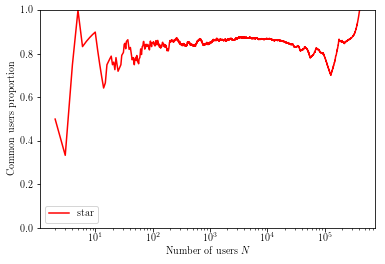

In [7]:
# init
fig, ax = plt.subplots()

# plot
ax.semilogx(x, df_oursin['common_users_prop'].values, color='red', label="star")
# ax.semilogx(x, df_cascade['common_users_prop'].values, color='red', ls='--', label="cascade")
# ax.semilogx(x, df_truegraph['common_users_prop'].values, color='red', ls='--', label="real")

# labels & legend
plt.xlabel(r"Number of users $N$", usetex=True)
plt.ylabel(r"Common users proportion", usetex=True)
plt.legend(loc='best')
plt.ylim(0,1)

# show save close
# plt.title(r"\texttt{Russian} dataset")
plt.savefig(out_path + name + "_common_user_prop.eps")
plt.savefig(out_path + name + "_common_user_prop.pdf")
plt.show()
plt.close()

plot common user prop + kendall tau

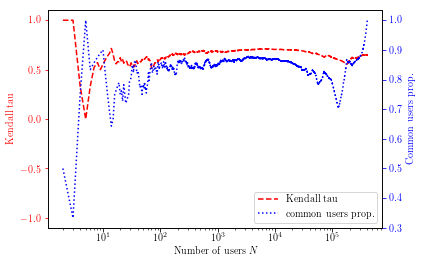

In [6]:
# init
fig, ax1 = plt.subplots()

# plot
ax1.set_ylim([-1.1,1.1])
kendall = ax1.semilogx(x, df_oursin['kendall'].values, color='red', ls='--', label="Kendall tau")
ax1.yaxis.set_ticks([-1,-0.5,0,0.5,1])
ax1.tick_params('y', colors='red')
ax2 = ax1.twinx()
common = ax2.semilogx(x, df_oursin['common_users_prop'].values, color='blue', ls=':', label="common users prop.")
ax2.tick_params('y', colors='blue')

# labels & legend
ax1.set_xlabel(r"Number of users $N$", usetex=True)
ax1.set_ylabel('Kendall tau', color='red')
ax2.set_ylabel('Common users prop.', color='b')
lns = kendall + common
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=4)

# show save close
# plt.title(r"\texttt{Russian} dataset")
plt.savefig(out_path + name + "_kendall+common_user_prop.eps")
plt.savefig(out_path + name + "_kendall+common_user_prop.pdf")
plt.show()
plt.close()

Plot mean dist

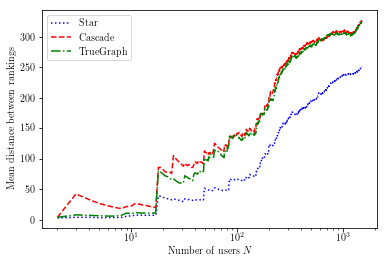

In [33]:
# init
fig, ax = plt.subplots()

# plot
ax.semilogx(x, df_oursin['mean_dist'].values, color='blue', ls=':', label="Star")
ax.semilogx(x, df_cascade['mean_dist'].values, color='red', ls='--', label="Cascade")
ax.semilogx(x, df_truegraph['mean_dist'].values, color='green', ls='-.', label="TrueGraph")

# labels & legend
plt.xlabel(r"Number of users $N$", usetex=True)
plt.ylabel(r"Mean distance between rankings", usetex=True)
plt.legend(loc='best')

# show save close
plt.savefig(out_path + name + "_mean_dist.eps", usetex=True)
plt.show()
plt.close()

## Influence direct comparison

Load influences into dicts.

In [10]:
# Psi = {'emulator':dict(), 'star':dict(), 'cascade':dict(), 'real':dict()}
# Psi = {'emulator':dict(), 'real':dict(), 'star':dict()}
# Psi = {'emulator':dict(), 'real':dict()}
Psi = {'emulator':dict(), 'star':dict()}

# # truegraph
# for line in open("../PsiResults/Psis/weibo_model_truegraph_top8002emul.txt"):
#     line = line.split()
#     user, psi = int(line[0]), float(line[1])
#     if psi > 0:
#         Psi['real'][user] = psi
        
# emul
for line in open("../PsiResults/Psis/russian_emul.txt", "r"):
# for line in open("../PsiResults/Psis/russian_emul.txt", "r"):
    line = line.split()
    user, psi = int(line[0]), float(line[1])
    if psi>0:
        Psi['emulator'][user] = psi

# oursin
for line in open("../PsiResults/Psis/russian_model_oursin_full0.txt"):
# for line in open("../PsiResults/Psis/russian_model_oursin.txt", "r"):
    line = line.split()
    user, psi = int(line[0]), float(line[1])
    if user in Psi['emulator']:
        Psi['star'][user] = psi

# # cascade
# for line in open("../PsiResults/Psis/weibo_model_cascade_top1501emul.txt", "r"):
# # for line in open("../PsiResults/Psis/russian_model_cascade.txt", "r"):
#     line = line.split()
#     user, psi = int(line[0]), float(line[1])
#     if user in Psi['emulator']:
#         Psi['cascade'][user] = psi
        
# # emul
# for line in open("../PsiResults/Psis/weibo_emul.txt", "r"):
# # for line in open("../PsiResults/Psis/russian_emul.txt", "r"):
#     line = line.split()
#     user, psi = int(line[0]), float(line[1])
#     if user in Psi['real']:
#         Psi['emulator'][user] = psi

In [5]:
Psi['star'].keys() == Psi['emulator'].keys()

True

Plot psi cumulative distribution.

In [9]:
colors = {'star': 'blue', 'cascade':'red', 'real':'red', 'emulator':'green'}
linestyle = {'star': ':', 'cascade':'--', 'real':'--' , 'emulator':'-.'}

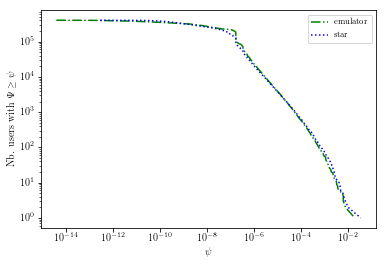

In [10]:
for origin, psis in Psi.items():

    # on compte les occurences
    values = np.array(sorted(psis.values()))
    unique, counts = np.unique(values, return_counts=True)

    # on cumule
    cumul = np.flip(np.cumsum(np.flip(counts)))

    # plot
    plt.loglog(unique, cumul, color=colors[origin], ls=linestyle[origin], label=origin)

# labels and legend
plt.legend(loc='best', fontsize='small') # fontsize='small'
plt.xlabel(r"$\psi$", usetex=True)
plt.ylabel(r"Nb. users with $\Psi \geq \psi$".format(origin), usetex=True)
# plt.title(r"Cumulative distribution of influence in $\texttt{Russian}$")

# save & show
plt.savefig(out_path + name + "_psi_cumul_distrib.eps")
plt.savefig(out_path + name + "_psi_cumul_distrib.pdf")
plt.show()
plt.close()

Histogram.

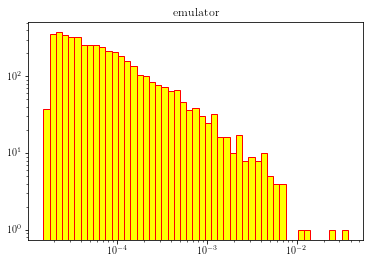

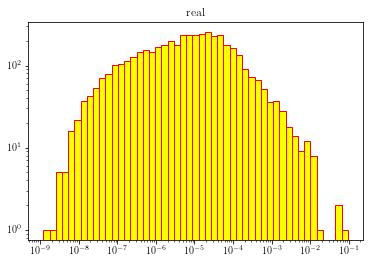

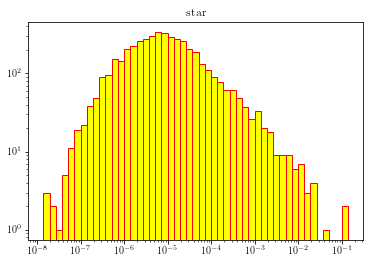

In [9]:
for origin, psis in Psi.items():
    values = np.array(sorted(psis.values()))
    fig, ax = plt.subplots()
    plt.yscale('log')    
    plt.xscale('log')
    logbins = np.logspace(np.log10(np.min(values)), np.log10(np.max(values)), 50)
    plt.hist(values, bins=logbins, edgecolor='red', facecolor='yellow')
#     plt.savefig("weibo_emul_hist.pdf")
    plt.title(origin)
    plt.show()
    plt.close()

Scatter plot log scale.

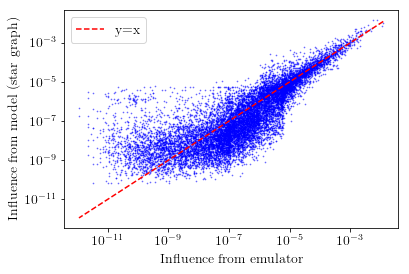

In [11]:
users = list(Psi['emulator'].keys())

for origin in Psi:
    if origin != 'emulator':
        
        # init
        fig, ax = plt.subplots()
        ax.set_xscale('log')
        ax.set_yscale('log')
        
        # scatter
        ax.scatter([Psi['emulator'][u] for u in users], [Psi[origin][u] for u in users], 
               color='blue', s=.5, alpha=.5)
        ax.plot([Psi['emulator'][u] for u in users], [Psi['emulator'][u] for u in users], 
                ls='--', color='red', label='y=x') 
        
        # save
        plt.legend(loc='best')
        plt.xlabel("Influence from emulator")
        plt.ylabel("Influence from model ({} graph)".format(origin))
        plt.savefig(out_path + name + "_psi_scatter_{}.eps".format(origin))
        plt.savefig(out_path + name + "_psi_scatter_{}.pdf".format(origin))

In [9]:
min([x for x in Psi['real'].values() if x>0])

1.20472e-09

In [24]:
set(users) == set(Psi['emulator'].keys())

True

## Nb (re)tweets cumulative distrib

Get activity stats.

In [44]:
trace_path = "../Datasets/russian_rtid.txt"
cascade = False
Author = util.get_authors(trace_path)
count = dict()
count['tweets'], count['retweets'], total_time = util.get_activity(
    trace_path, cascade, Author, divide_by_time=False, retweeted=False)

Plot.

In [45]:
name = "russian"

In [46]:
linestyle = {'tweets': ':', 'retweets':'--', 'retweeted':'-.'}

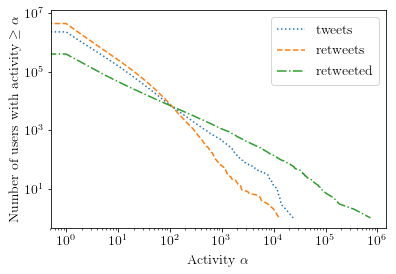

In [47]:
for count_type in count.keys():
   
    # on récupère les valeurs
    d = [*count[count_type].values()]
    d_unique = sorted(set(d))
    
    # on compte les occurences
    nb_occ = list()
    for val in d_unique:
        nb_occ.append(len([x for x in d if x>=val]))

    # plot
    plt.loglog(d_unique, nb_occ, ls=linestyle[count_type], label=count_type)
    plt.xlabel(r"Activity $\alpha$")
    plt.ylabel(r"Number of users with activity $\geq \alpha$")
    
# save & show
plt.legend(loc='best')
plt.savefig(out_path + name + "_activity_cumul_distrib_log.eps")
plt.show()
plt.close()

## Correlations - urchin

In [15]:
trace_path = "../Datasets/weibo_rtid.txt"
cascade = False
# outfile = out_path + name + "_correlations.txt"

Get authors.

In [16]:
Author = util.get_authors(trace_path)

Get user graph.

In [6]:
LeadGraph, FollowGraph = util.graph_from_trace(trace_path, cascade, Author)
del LeadGraph

Get activity.

In [7]:
Lambda, Mu, total_time = util.get_activity(trace_path, cascade, Author, divide_by_time=True, retweeted=False)

Prepare for correlations.

In [8]:
outdegs = list()
lambdas = list()
mus = list()
psis_model = list()
psis_emul = list()

for u in Psi['star']:
    outdegs.append(len(FollowGraph[u]))
    lambdas.append(Lambda[u])
    mus.append(Mu[u])
    psis_model.append(Psi['star'][u])
    psis_emul.append(Psi['emulator'][u])

Compute correlations.

In [9]:
outdegs = np.array(outdegs).reshape(-1,1)
lambdas = np.array(lambdas).reshape(-1,1)
mus = np.array(mus).reshape(-1,1)
psis_model = np.array(psis_model).reshape(-1,1)
psis_emul = np.array(psis_emul).reshape(-1,1)

with open(outfile, 'a') as out:
    out.write("STAR\n")
    # outdeg
    corr = np.corrcoef(np.concatenate((outdegs, psis_model), axis=1), rowvar=False)[0,1]
    out.write("Correlation coeff between outdeg and psi_model : {}\n".format(corr))
    # lambda
    corr = np.corrcoef(np.concatenate((lambdas, psis_model), axis=1), rowvar=False)[0,1]
    out.write("Correlation coeff between lambda and psi_model : {}\n".format(corr))
    # mu
    corr = np.corrcoef(np.concatenate((mus, psis_model), axis=1), rowvar=False)[0,1]
    out.write("Correlation coeff between mu and psi_model : {}\n".format(corr))
    # psis
    corr = np.corrcoef(np.concatenate((psis_emul, psis_model), axis=1), rowvar=False)[0,1]
    out.write("Correlation coeff between psi_emul and psi_model : {}\n".format(corr))

## Correlations - cascade

In [10]:
cascade = True

Get user graph.

In [18]:
LeadGraph, FollowGraph = util.graph_from_trace(trace_path, cascade, Author)
del LeadGraph

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-6967a5684a34>", line 1, in <module>
    LeadGraph, FollowGraph = util.graph_from_trace(trace_path, cascade, Author)
  File "D:\PC de Antoine\Documents - data drive\Stage2019\Code\util.py", line 233, in graph_from_trace
    for tweet in open(data_path, 'r'):
  File "D:\Anaconda\lib\encodings\cp1252.py", line 22, in decode
    def decode(self, input, final=False):
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2033, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (m

KeyboardInterrupt: 

Get activity.

In [17]:
Lambda, Mu, total_time = util.get_activity(trace_path, cascade, Author, divide_by_time=True, retweeted=False)

Prepare for correlations.

In [13]:
outdegs = list()
lambdas = list()
mus = list()
psis_model = list()
psis_emul = list()

for u in Psi['cascade']:
    outdegs.append(len(FollowGraph[u]))
    lambdas.append(Lambda[u])
    mus.append(Mu[u])
    psis_model.append(Psi['cascade'][u])
    psis_emul.append(Psi['emulator'][u])

Compute correlations.

In [14]:
outdegs = np.array(outdegs).reshape(-1,1)
lambdas = np.array(lambdas).reshape(-1,1)
mus = np.array(mus).reshape(-1,1)
psis_model = np.array(psis_model).reshape(-1,1)
psis_emul = np.array(psis_emul).reshape(-1,1)

with open(outfile, 'a') as out:
    out.write("\nCASCADE\n")
    # outdeg
    corr = np.corrcoef(np.concatenate((outdegs, psis_model), axis=1), rowvar=False)[0,1]
    out.write("Correlation coeff between outdeg and psi_model : {}\n".format(corr))
    # lambda
    corr = np.corrcoef(np.concatenate((lambdas, psis_model), axis=1), rowvar=False)[0,1]
    out.write("Correlation coeff between lambda and psi_model : {}\n".format(corr))
    # mu
    corr = np.corrcoef(np.concatenate((mus, psis_model), axis=1), rowvar=False)[0,1]
    out.write("Correlation coeff between mu and psi_model : {}\n".format(corr))
    # psis
    corr = np.corrcoef(np.concatenate((psis_emul, psis_model), axis=1), rowvar=False)[0,1]
    out.write("Correlation coeff between psi_emul and psi_model : {}\n".format(corr))

## Correlations - truegraph

In [23]:
cascade = False

Get outdegs.

In [15]:
outdeg_dict = {u:0 for u in Psi['emulator']}
for i,line in enumerate(open("../Datasets/weibo_filtered_adjList.txt")):
    if i%50000==0:
        sys.stdout.flush()
        sys.stdout.write("{}\r".format(i))
    lead = int(line.split()[0])
    if lead in Psi['emulator']:
        outdeg_dict[lead] += 1

Get activity.

In [12]:
Lambda, Mu, total_time = util.get_activity("../Datasets/weibo_rtid.txt", False, Author, divide_by_time=True, retweeted=False)

NameError: name 'cascade' is not defined

Prepare for correlations.

In [18]:
outdegs = list()
lambdas = list()
mus = list()
psis_model = list()
psis_emul = list()

for u in Psi['real']:
    outdegs.append(outdeg_dict[u])
    lambdas.append(Lambda[u])
    mus.append(Mu[u])
    psis_model.append(Psi['real'][u])
    psis_emul.append(Psi['emulator'][u])

Compute correlations.

In [19]:
outdegs = np.array(outdegs).reshape(-1,1)
lambdas = np.array(lambdas).reshape(-1,1)
mus = np.array(mus).reshape(-1,1)
psis_model = np.array(psis_model).reshape(-1,1)
psis_emul = np.array(psis_emul).reshape(-1,1)

with open(outfile, 'a') as out:
    out.write("\nTRUEGRAPH\n")
    # outdeg
    corr = np.corrcoef(np.concatenate((outdegs, psis_model), axis=1), rowvar=False)[0,1]
    out.write("Correlation coeff between outdeg and psi_model : {}\n".format(corr))
    # lambda
    corr = np.corrcoef(np.concatenate((lambdas, psis_model), axis=1), rowvar=False)[0,1]
    out.write("Correlation coeff between lambda and psi_model : {}\n".format(corr))
    # mu
    corr = np.corrcoef(np.concatenate((mus, psis_model), axis=1), rowvar=False)[0,1]
    out.write("Correlation coeff between mu and psi_model : {}\n".format(corr))
    # psis
    corr = np.corrcoef(np.concatenate((psis_emul, psis_model), axis=1), rowvar=False)[0,1]
    out.write("Correlation coeff between psi_emul and psi_model : {}\n".format(corr))

## Stats for top influencers

In [71]:
i = 0
print("   user \t  psi_em        psi_model    rankE    rankM    outdeg \t       lambda")
print("----------------------------------------------------------------------------------------")
for user,psi_emul in sorted(Psi['emulator'].items(), key=itemgetter(1), reverse=True)[:10]:
    rank_emul = i+1
    psi_real = Psi['real'][user]
    psi_star = Psi['star'][user]
    rank_real = sorted(Psi['real'].items(), key=itemgetter(1), reverse=True).index((user,psi_real))+1
    rank_star = sorted(Psi['star'].items(), key=itemgetter(1), reverse=True).index((user,psi_star))+1
    print(user, psi_emul, psi_real, psi_star, rank_emul, rank_real, rank_star, len(FollowGraph[user]), Lambda[user], sep='\t')
    print("----------------------------------------------------------------------------------------")
    i += 1

   user 	  psi_em        psi_model    rankE    rankM    outdeg 	       lambda
----------------------------------------------------------------------------------------
20905367	0.0120236	0.0102285	1	3	6676	4.2908668286571055e-06
----------------------------------------------------------------------------------------
82299300	0.0112891	0.00702864	2	5	7833	9.603368616518285e-06
----------------------------------------------------------------------------------------
494076761	0.00734964	0.0138047	3	2	6963	4.393030324577513e-05
----------------------------------------------------------------------------------------
615422017	0.00532525	0.0138173	4	1	5474	6.395434844617495e-05
----------------------------------------------------------------------------------------
174953869	0.00513206	0.00580884	5	7	1742	1.1850965526767245e-05
----------------------------------------------------------------------------------------
711363811	0.0047856	0.00411834	6	15	1309	8.173079673632582e-07
---------------

## MISC USELESS